# Project: Movie Data Analysis


In this project, we hope to find and gather interesting questions while exploring the dataset such as relationship between popularity and other features, voting average and other features, and number of movie released over year


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [75]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head() 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [76]:
df.shape 

(10866, 21)

In [77]:
df.duplicated().sum() 

1

In [78]:
df.isnull().sum() 

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [79]:
correlation = df.corr()
correlation

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


In [80]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [82]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [83]:
df_budget_0 = df.query('budget == 0') #identifying where budget value is equal to 0
df_budget_0.budget.count()

5696

In [84]:
df_revenue_0 = df.query('revenue == 0') #identifying where revenue value is equal to 0
df_revenue_0.revenue.count()

6016

In [85]:
df_runtime_0 = df.query('runtime == 0') #identifying where runtime value is equal to 0
df_runtime_0.runtime.count()

31

General findings through data wrangling practice
1. dataset seems pretty straight forward except a few columns such as 'cash', 'genres', 'production_companies' which all contains multiple values and separated by ' | '.
2. 10866 rows and 21 columns - there are some columns with sigificant amount of null values ('tagline','keywords','homepage',etc). It might be wise to exclude those columns as they wouldn't be too helpful to answer the questions due to amount of null values.
3. identified with rows containing 0 values in budget (5696 values), revenue(6016 values), and runtime(31 values). Since there are significant amount of 0 value data for budget and revenue, dropping them will decrease the size of the dataset given and thereby assume these are just null values. 

In [86]:
df_wk = df # creating/copying the dataset under new name (df_wk) to make any necessary changes/adjustments without altering the original dataset

### Data Cleaning (Replace this with more specific notes!)

In [87]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [88]:
df_wk = df_wk.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'],axis=1) #drop any unnecessary columns

In [89]:
df_wk.isnull().sum() # check to see any null values 

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [90]:
df.drop_duplicates(inplace=True) # drop rows with duplicated values


In [91]:
smallnull = ['cast','director','genres'] # drop any null values in cast, director, and genres columns
df_wk.dropna(subset=smallnull, inplace=True)

In [92]:
df_wk.isnull().sum() 

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [93]:
df_wk = df_wk[df_wk.runtime != 0] # drop rows where movie runtime equals to 0

In [94]:
df_wk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10704 entries, 0 to 10865
Data columns (total 15 columns):
id                      10704 non-null int64
popularity              10704 non-null float64
budget                  10704 non-null int64
revenue                 10704 non-null int64
original_title          10704 non-null object
cast                    10704 non-null object
director                10704 non-null object
keywords                9294 non-null object
runtime                 10704 non-null int64
genres                  10704 non-null object
production_companies    9760 non-null object
release_date            10704 non-null object
vote_count              10704 non-null int64
vote_average            10704 non-null float64
release_year            10704 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.3+ MB


In [95]:
df_wk['budget'] = df_wk.budget.replace(0, np.NaN)
df_wk['revenue'] = df_wk.revenue.replace(0, np.NaN) # replace 0 values with null values so we don't lose too many raw data

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### 1) How are revenue levels associated with voting average or popularity?

In [96]:
#creating a function to divide data into different levels 

df_wk.revenue.describe()
def quantcut (dfname,columnname):
    #locating min, max, and quantile values
    min_value = dfname[columnname].min()
    first = dfname[columnname].describe()[4]
    second = dfname[columnname].describe()[5]
    third = dfname[columnname].describe()[6]
    max_value = dfname[columnname].max()
    #assinging into different levels of data
    bin_edges = [min_value,first,second,third,max_value]
    #naming of the levels
    bin_names = ['low','medium','moderately high','high']
    #adding a new column named 'newcolumn_levels'and appending into dataset
    newcolumn = '{}_levels'.format(columnname)
    dfname[newcolumn] = pd.cut(dfname[columnname],bin_edges,labels=bin_names)

In [97]:
quantcut (df_wk,'revenue')
df_rl = df_wk.groupby(['release_year','revenue_levels']).median() #grouping data by revenue levels in each year to see if quantcut function works
df_rl.tail(16)
df_wk.tail(5)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_levels
10861,21,0.080598,NaN,NaN,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,NaN
10862,20379,0.065543,NaN,NaN,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,NaN
10863,39768,0.065141,NaN,NaN,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,NaN
10864,21449,0.064317,NaN,NaN,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,NaN
10865,22293,0.035919,19000.0,NaN,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,fire|gun|drive|sacrifice|flashlight,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,NaN


In [49]:
rva_mean = df_rl.groupby('revenue_levels')['vote_average'].mean() #finding mean/median value of vote average for each level
rva_mean

revenue_levels
low                6.258491
medium             6.252679
moderately high    6.431818
high               6.528431
Name: vote_average, dtype: float64

In [50]:
rva_median = df_rl.groupby('revenue_levels')['vote_average'].median()
rva_median

revenue_levels
low                6.2
medium             6.1
moderately high    6.4
high               6.4
Name: vote_average, dtype: float64

([<matplotlib.axis.XTick at 0x7f44fef4a4e0>,
 <a list of 4 Text xticklabel objects>)

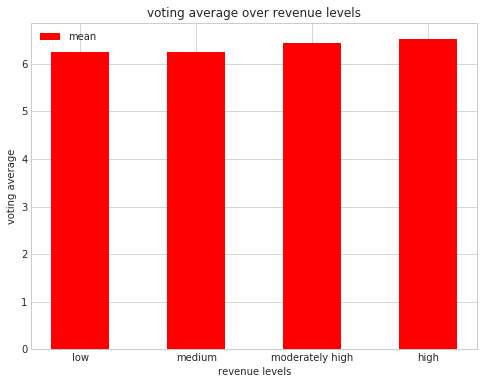

In [98]:
sns.set_style('whitegrid') #background style
ind = np.arange(len(rva_mean)) #x locations (4)
width = 0.5 #width of each bar

plt.subplots(figsize=(8,6)) #sizing chart
bars = plt.bar(ind, rva_mean, width, color='r', label='mean'); #plotting

plt.ylabel('voting average') #labeling x,y,title,legend
plt.xlabel('revenue levels')
plt.title('voting average over revenue levels')
locations = ind
plt.legend(loc='upper left')
labels=rva_median.index
plt.xticks(locations,labels)

([<matplotlib.axis.XTick at 0x7f44fda94d30>,
 <a list of 4 Text xticklabel objects>)

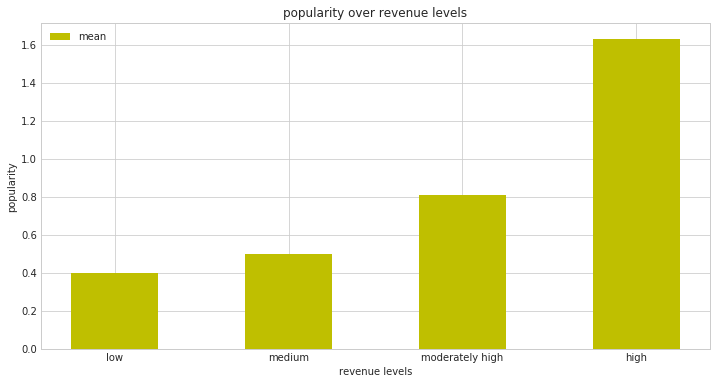

In [99]:
rop_mean = df_rl.groupby('revenue_levels')['popularity'].mean()
rop_median = df_rl.groupby('revenue_levels')['popularity'].median()
ind = np.arange(len(rop_mean))
width = 0.5

plt.subplots(figsize=(12,6))
bars = plt.bar(ind, rop_mean, width, color='y', label='mean');

plt.ylabel('popularity')
plt.xlabel('revenue levels')
plt.title('popularity over revenue levels')
locations = ind
plt.legend(loc='upper left')
labels=rop_median.index
plt.xticks(locations,labels)

### 2) How are buget levels associated with high voting average or popularity?

In [37]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

In [110]:
df_wk.budget.describe() #displaying quantile values
df_wk.budget.quantile([0.25,.50,.75])

0.25     6000000.0
0.50    17500000.0
0.75    40000000.0
Name: budget, dtype: float64

In [106]:
bin_edges = [1.0,6000000,17500000,40000000,425000000] #Cutting data into different levels without using quantcut function
bin_names = ['low','medium','modrately high','high']
df_wk['budget_levels'] = pd.cut(df_wk['budget'],bin_edges, labels = bin_names)

In [111]:
bva_mean = df_wk.groupby('budget_levels')['vote_average'].mean()
bva_mean

budget_levels
low               5.949887
medium            6.016922
modrately high    6.065357
high              6.104504
Name: vote_average, dtype: float64

In [112]:
bva_median = df_wk.groupby('budget_levels')['vote_average'].median()
bva_median

budget_levels
low               6.0
medium            6.1
modrately high    6.1
high              6.1
Name: vote_average, dtype: float64

([<matplotlib.axis.XTick at 0x7f44fd8bd4a8>,
 <a list of 4 Text xticklabel objects>)

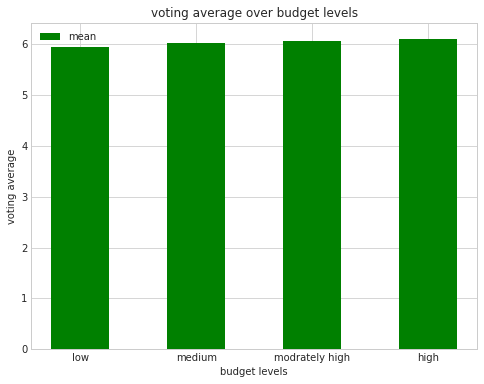

In [113]:
sns.set_style('whitegrid')
ind = np.arange(len(bva_mean))
width = 0.5

plt.subplots(figsize=(8,6))
bars = plt.bar(ind, bva_mean, width, color='g', label='mean');

plt.ylabel('voting average')
plt.xlabel('budget levels')
plt.title('voting average over budget levels')
locations = ind
plt.legend(loc='upper left')
labels=bva_median.index
plt.xticks(locations,labels)

In [114]:
df_bl = df_wk.groupby(['release_year','budget_levels']).median()
df_bl.tail(16)

id  popularity       budget      revenue  \
release_year budget_levels                                                    
2012         low             102629.5    0.323133    2500000.0    3666415.0   
             medium           84907.0    0.628612   12000000.0   17515403.0   
             modrately high   79543.5    0.898130   30000000.0   41863726.0   
             high             71266.5    1.775178   75000000.0  275933194.0   
2013         low             171759.5    0.296225    2500000.0    3265063.5   
             medium          158011.0    0.718403   10000000.0   16505460.0   
             modrately high  133805.0    1.031715   28000000.0   46729293.0   
             high             80274.0    1.689869  100000000.0  243843127.0   
2014         low             252082.5    0.445398    3000000.0    4013786.0   
             medium          240239.5    0.817763   11500000.0   29958481.5   
             modrately high  227156.0    1.136851   25000000.0   67800064.0   
             high            145220.0    3.007018   85000000.0  239379423.0   
2015         low             298913.5    0.419863    2500000.0   10093300.5   
             medium          283235.0    1.007054   11000000.0   19955594.5   
             modrately high  272298.0    1.859854   28500000.0   56788969.0   
             high            211672.0    3.899557   90000000.0  244935102.0   

                             runtime  vote_count  vote_average  
release_year budget_levels                                      
2012         low                92.5        25.5          5.30  
             medium            100.0       160.0          5.90  
             modrately high    100.5       231.5          5.75  
             high              109.5      1388.0          6.20  
2013         low                92.0        36.0          5.50  
             medium            100.0       138.0          6.00  
             modrately high    109.0       469.0          6.20  
             high              114.0      1755.0          6.30  
2014         low                94.0        63.5          5.70  
             medium            104.5       169.0          6.05  
             modrately high    107.0       384.0          6.20  
             high              112.0      1555.0          6.50  
2015         low                94.0        63.5          5.70  
             medium            104.0       197.0          5.90  
             modrately high    110.0       476.5          6.10  
             high              119.0      1578.0          6.40

([<matplotlib.axis.XTick at 0x7f44fd725160>,
 <a list of 4 Text xticklabel objects>)

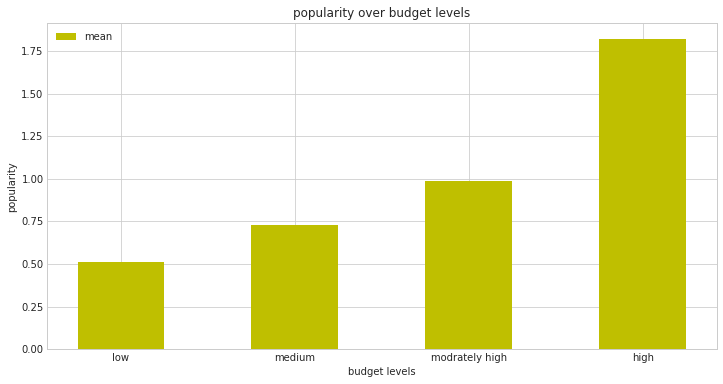

In [123]:
bl_mean = df_wk.groupby('budget_levels')['popularity'].mean()
bl_median = df_wk.groupby('budget_levels')['popularity'].median()
ind = np.arange(len(bl_mean))
width = 0.5

plt.subplots(figsize=(12,6))
bars = plt.bar(ind, bl_mean, width, color='y', label='mean');

plt.ylabel('popularity')
plt.xlabel('budget levels')
plt.title('popularity over budget levels')
locations = ind
plt.legend(loc='upper left')
labels=bl_median.index
plt.xticks(locations,labels)

In [117]:
cut(df_wk,'runtime')

([<matplotlib.axis.XTick at 0x7f44fd7aef98>,
 <a list of 4 Text xticklabel objects>)

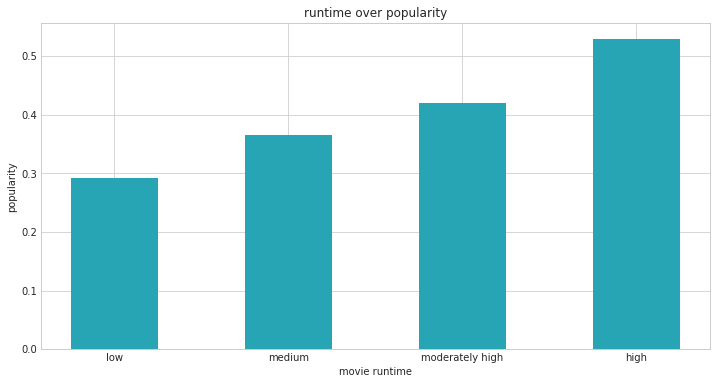

In [118]:
rtop_mean = df_wk.groupby('runtime_levels')['popularity'].mean()
rtop_median = df_wk.groupby('runtime_levels')['popularity'].median()

ind = np.arange(len(rtop_median))
width = 0.5

sns.set_style('whitegrid')

plt.subplots(figsize=(12,6))
plt.bar(ind,rtop_median,width,color = '#27a5b4',label='median');
plt.title('runtime over popularity')
plt.xlabel('movie runtime')
plt.ylabel('popularity')
locations = ind
labels = rtop_median.index
plt.xticks (locations,labels)

### 3) Number of Movie released Year by Year and Popularity Trend

In [45]:
count_movie = df_wk.groupby('release_year').count()['id']
count_movie

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     38
1968     38
1969     30
1970     40
1971     55
1972     40
1973     55
1974     46
1975     44
1976     47
1977     56
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    104
1985    108
1986    120
1987    124
1988    142
1989    135
1990    132
1991    133
1992    132
1993    177
1994    184
1995    174
1996    203
1997    191
1998    210
1999    224
2000    223
2001    241
2002    262
2003    280
2004    307
2005    359
2006    403
2007    432
2008    485
2009    524
2010    476
2011    529
2012    572
2013    644
2014    680
2015    610
Name: id, dtype: int64

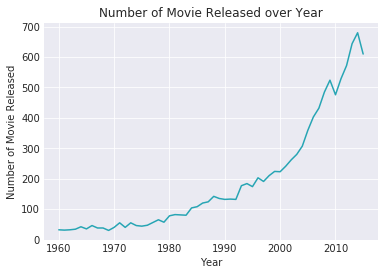

In [119]:
sns.set_style('darkgrid')
x = count_movie.index #movie release year
y = count_movie #number of movie released 

plt.plot(x,y,color = '#27a5b4');

plt.ylabel('Number of Movie Released')
plt.xlabel('Year')
plt.title('Number of Movie Released over Year')
plt.figure(figsize=(12,6))

In [120]:
#Popularity Trend - finding mean/median of popularity for each year
pop_mean = df_wk.groupby('release_year').mean()['popularity']
pop_med = df_wk.groupby('release_year').median()['popularity']
index_mean = pop_mean.index
index_med = pop_med.index

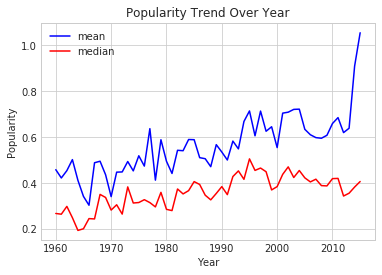

In [122]:
x1,y1 = index_mean, pop_mean #setting mean and median data in x1,y1 & x2,y2 
x2,y2 = index_med , pop_med
plt.plot(x1,y1, color = 'b', label = 'mean')
plt.plot(x2,y2, color = 'r', label = 'median')
plt.title('Popularity Trend Over Year')
plt.xlabel('Year')
plt.ylabel('Popularity');
plt.legend(loc='upper left')
sns.set_style('whitegrid')
plt.figure(figsize=(12,6));

<a id='conclusions'></a>
## Conclusions

1) How are revenue levels associated with movies that have voting average or popularity?
-  the corresponding graph indicates that high revenue level leads to higher popularity. Higher popularity among audiance would encourge and intrigue people who have not seen the movie. However, high revenue level does not mean it would receive a good rating. It shows that there's much difference between low revenue level to high revenue level.

2) How are budget levels associated with movies that have voting average or popularity?
- buget levels and popularity have positive correlation since higher budget level movies may have more capital to invest in advertising the movie. However, higher budget does not seem to gurantee higher movie ratings

3) Number of Movie released Year by Year and Popularity Trend
- number of movie released has been increseing year over year, especially after 1990 and 2000. I would assume it's due to higher demand in entertainment business and higher quality of movies being made. Also,the popularity mean trend has significant incresased year over year possibly due to more clever and anticipated promotion and advertising stragies funded by higher budget levels of movie compared to old days. Further, advanced internet and technology enables us to easilly access any movie at any time.

In [124]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0